### Credit Card Lead Prediction
#### Problem Statement
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

#### 1. Defining the problem statement
Happy Customer Bank is a mid-sized private bank wants to cross sell its credit cards to its existing customers and is looking for help in identifying customers that could show higher intent towards a recommended credit card.

#### 2. Collecting the data
Using pandas to load train and test csv files


In [1]:
import pandas as pd
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### 3. Exploratory Data Analysis
Printing the first five rows of the train data

In [2]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


##### Train Set Data Attributes
- Variable: Definition : Definition
- ID                   : Unique Identifier for a row 	
- Gender               : Gender of the Customer 	
- Age                  : Age of the Customer (in Years)
- Region_Code          : Code of the Region for the customers
- Occupation           : Occupation Type for the customer 
- Channel_Code         : Acquisition Channel Code for the Customer  (Encoded)
- Vintage              : Vintage for the Customer (In Months)
- Credit_Product       : If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
- Avg_Account_Balance  : Average Account Balance for the Customer in last 12 Months              
- Is_Active            : If the Customer is Active in last 3 Months
- Is_Lead(Target)      : If the Customer is interested for the Credit Card, 0 : Customer is not interested, 1 : Customer is interested

In [4]:
print("train set rows\t\t: {}".format(train.shape[0]))
print("train set columns\t: {}\n".format(train.shape[1]))
print("test set rows\t\t: {}".format(test.shape[0]))
print("test set columns\t: {}".format(test.shape[1]))

train set rows		: 245725
train set columns	: 11

test set rows		: 105312
test set columns	: 10


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [7]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Both train and test set have NaN values under Credit Product attribute.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [10]:
def bar_chart(feature):
    lead = train[train['Is_Lead']==1][feature].value_counts()
    not_lead = train[train['Is_Lead']==0][feature].value_counts()
    df = pd.DataFrame([lead,not_lead])
    df.index = ['Is a lead','Not a lead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

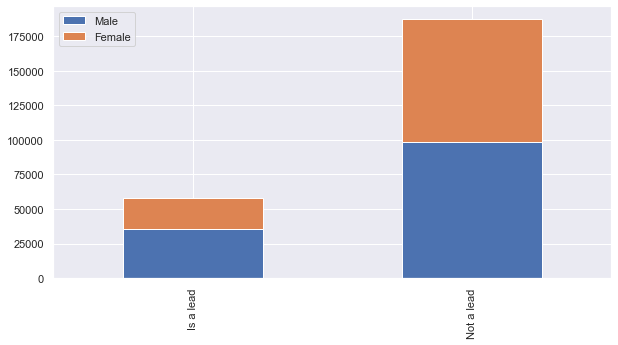

In [11]:
bar_chart('Gender')

The above chart suggests that genders really doesn't define if someone is not interested in credit cards. Among those who are interested to have credit card there are more men than woman.

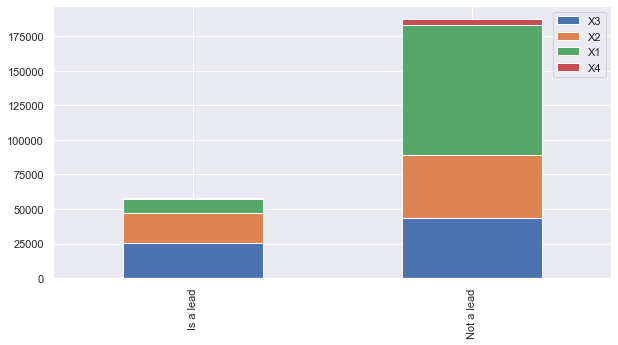

In [12]:
bar_chart('Channel_Code')

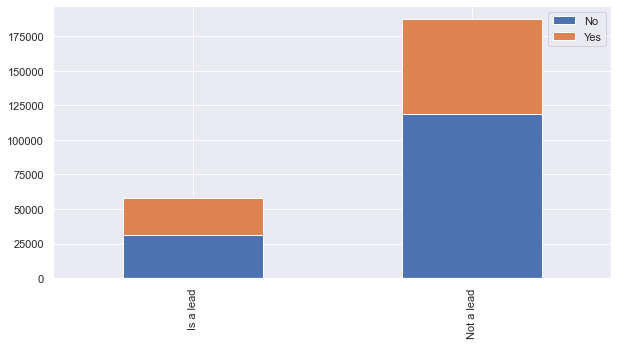

In [13]:
bar_chart('Is_Active')

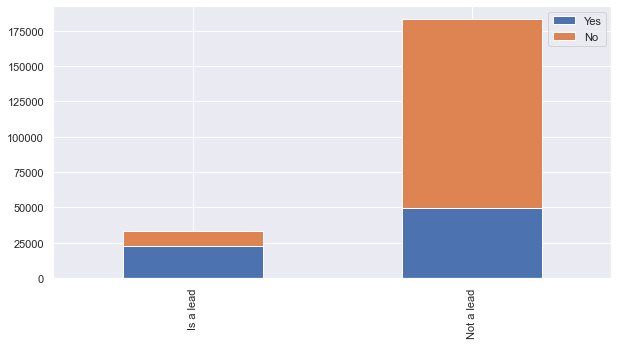

In [14]:
bar_chart('Credit_Product')

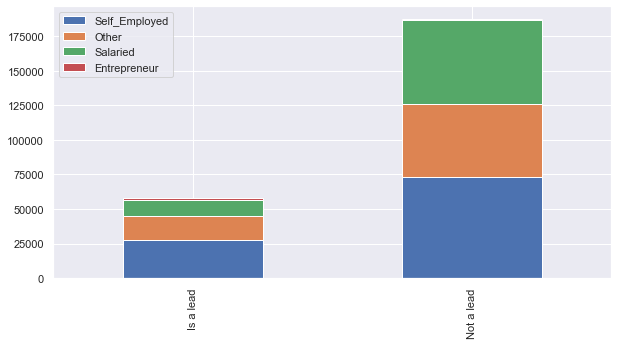

In [15]:
bar_chart('Occupation')

#### 4. Feature Engineering
The algorithms in machine learning require a numerical representation of data so that
such representations facilitate processing and statistical analysis. 

The following attributes can be looked upon for feature engineering
- Gender *
- Age *
- Region Code
- Occupation *
- Channel Code *
- Vintage *
- Credit Product 
- Average Account Balance *
- Is Active *

Since Gender, Occupation, Channel Code, and Is Active attributes have only few dimentions and do not have Nan values, it would be easy to map out their values to numrica values easily.

#### 4.1 Gender
Gender mapping [male:0, female: 1]

In [16]:
train_test_data = [train, test]

In [17]:
gender_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(gender_mapping)

#### 4.2 Occupation
Occupation Mapping [Self Employed: 0, other: 1, Salaried: 2, Entreprenuer: 3]

In [18]:
occupation_mapping = {"Self_Employed": 0, "Other": 1, "Salaried": 2, "Entrepreneur": 3}
for dataset in train_test_data:
    dataset['Occupation'] = dataset['Occupation'].map(occupation_mapping)

#### 4.3 Channel Code
Channel code Mapping [X1: 0, X2: 1, X3: 2, X4: 3]

In [19]:
channel_code_mapping = {"X1": 0, "X2": 1, "X3": 2, "X4": 3}
for dataset in train_test_data:
    dataset['Channel_Code'] = dataset['Channel_Code'].map(channel_code_mapping)

#### 4.4 Is Active
Credit Product Mapping [No: 0, Yes: 1]

In [20]:
is_active_mapping = {"No": 0, "Yes": 1}
for dataset in train_test_data:
    dataset['Is_Active'] = dataset['Is_Active'].map(is_active_mapping)

#### 4.5 Age

In [21]:
print("Maximum Age: {}".format(train["Age"].max()))
print("Minimum Age: {}".format(train["Age"].min()))

Maximum Age: 85
Minimum Age: 23


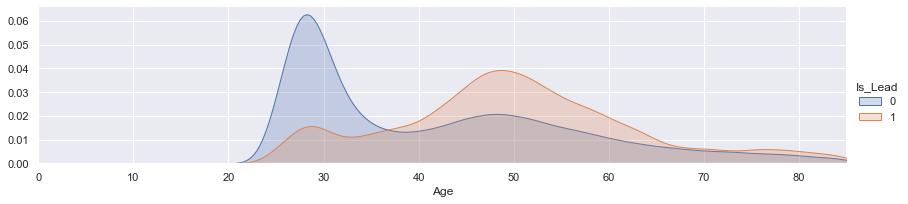

In [22]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

According the the age distribution with respect to the "Is Lead" attribute, there are several cross over points.


(20.0, 40.0)

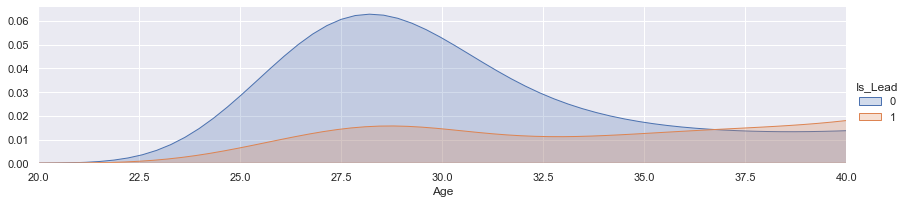

In [23]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)

(35.0, 70.0)

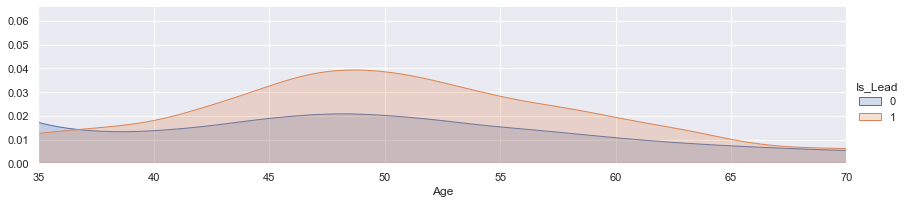

In [24]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(35, 70)

(70.0, 85.0)

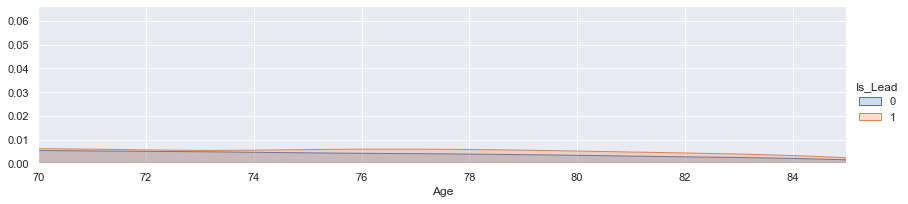

In [25]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(70, 85)

#### 4.5.1 Binning - Age
Binning/Converting Numerical Age to Categorical Variable

Feature vector map

Under 37 years old:           0

More the 37 and less than 70: 1

Greater than 70:              2


In [26]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 37, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 70), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 2

#### 4.6 Vintage

In [27]:
print("Maximum vintage in months: {}".format(train["Vintage"].max()))
print("Minimum vintage in months: {}".format(train["Vintage"].min()))

Maximum vintage in months: 135
Minimum vintage in months: 7


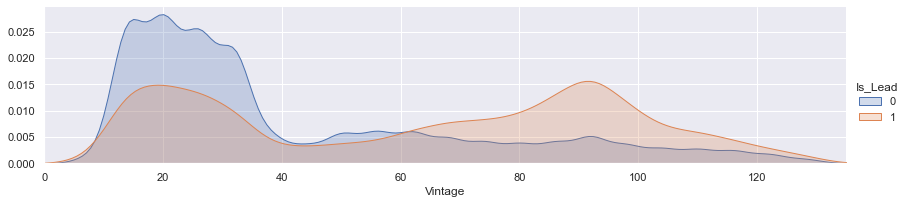

In [28]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.show() 

Observing cross over points in the vintage vs is_lead attribute

(0.0, 10.0)

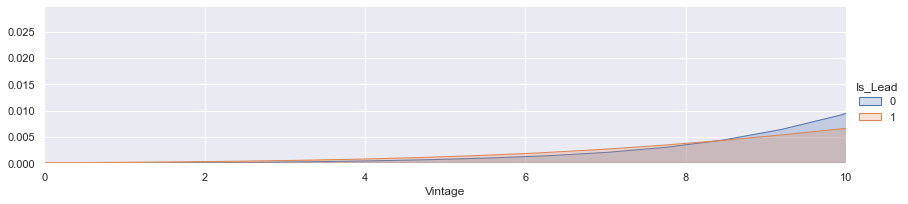

In [29]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(0, 10)

(7.0, 65.0)

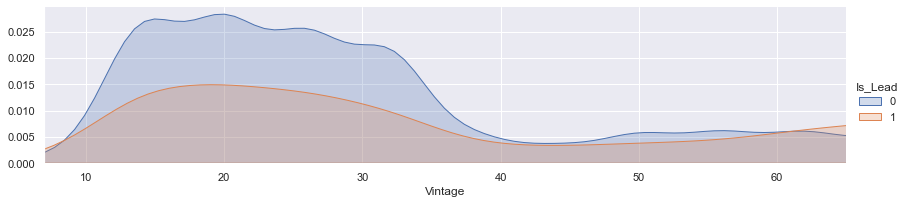

In [30]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(7, 65)

(60.0, 135.0)

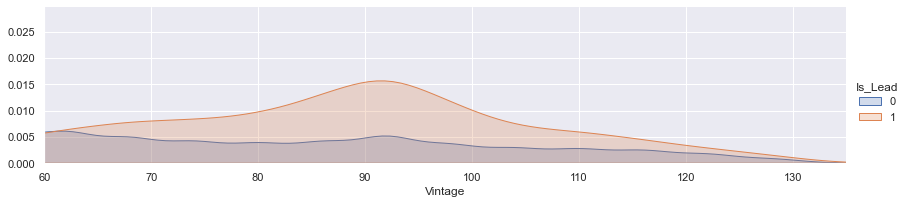

In [31]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(60, 135)

#### 4.6.1 Binning - Vintage
Binning/Converting Numerical Vintage to Categorical Variable

Feature vector map

Under 8 months old: 0

More the 8 and less than 62 months: 1

Greater than 62: 2

In [32]:
for dataset in train_test_data:
    dataset.loc[ dataset['Vintage'] <= 8, 'Vintage'] = 0
    dataset.loc[(dataset['Vintage'] > 8) & (dataset['Vintage'] <= 62), 'Vintage'] = 1
    dataset.loc[ dataset['Vintage'] > 62, 'Vintage'] = 2

#### 4.7 Average Account Banlance

In [33]:
print("Maximum average account balance: {}".format(train["Avg_Account_Balance"].max()))
print("Minimum average account balance: {}".format(train["Avg_Account_Balance"].min()))

Maximum average account balance: 10352009
Minimum average account balance: 20790


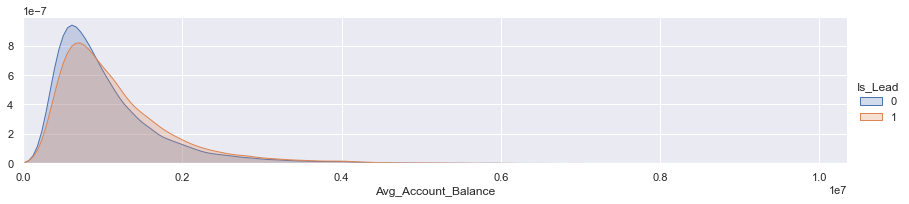

In [34]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.show()

(0.0, 1000000.0)

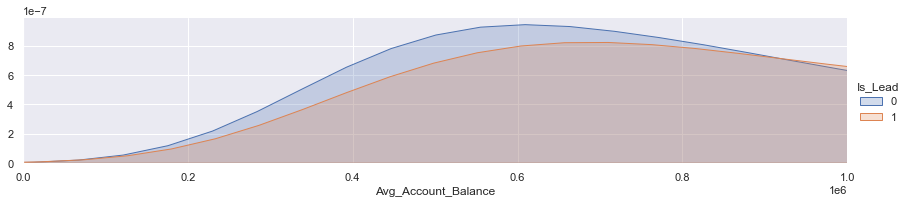

In [35]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.xlim(0, 1000000)

(1000000.0, 3000000.0)

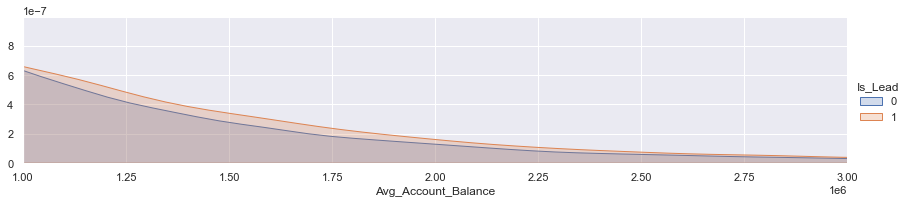

In [36]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.xlim(1000000, 3000000)

#### 4.8.1 Binning - Average Account Balance
Binning/Converting Numerical Average Account Balance to Categorical Variable

Feature vector map

Under 1000000 : 0

More the 1000000 and less than 3000000 months: 1

Greater than 3000000: 2

In [37]:
for dataset in train_test_data:
    dataset.loc[ dataset['Avg_Account_Balance'] <= 1000000, 'Avg_Account_Balance'] = 0
    dataset.loc[(dataset['Avg_Account_Balance'] > 1000000) & (dataset['Vintage'] <= 3000000), 'Avg_Account_Balance'] = 1
    dataset.loc[ dataset['Avg_Account_Balance'] > 3000000, 'Avg_Account_Balance'] = 2

In [38]:
train.head(40)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,2,RG268,1,2,1,No,1,0,0
1,IDD62UNG,1,0,RG277,2,0,1,No,0,0,0
2,HD3DSEMC,1,1,RG268,0,2,1,No,1,1,0
3,BF3NC7KV,0,0,RG270,2,0,1,No,0,0,0
4,TEASRWXV,1,0,RG282,2,0,1,No,0,0,0
5,ACUTYTWS,0,1,RG261,0,0,1,No,0,1,0
6,ETQCZFEJ,0,1,RG282,1,2,1,NaN,1,1,1
7,JJNJUQMQ,1,1,RG265,0,2,1,No,0,1,0
8,ZMQFYKCB,1,1,RG283,0,1,1,No,1,0,0
9,NVKTFBA2,1,1,RG268,0,1,1,Yes,1,0,0


#### 4.9 Region Code

In [39]:
train["Region_Code"].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [40]:
region_code_mapping = {"RG268": 0, "RG283": 1, "RG254": 1,
                 "RG284": 1, "RG277": 2, "RG280": 2,
                 "RG269": 3, "RG270": 3, "RG261": 3,
                 "RG257": 3, "RG251": 3, "RG282": 3,     
                 "RG274": 3, "RG272": 3, "RG281": 3,
                 "RG273": 3, "RG252": 3, "RG279": 3,
                 "RG263": 3, "RG275": 3,    "RG260": 3,
                 "RG256": 3,    "RG264": 3,    "RG276": 3,    
                 "RG259": 3,    "RG250": 3,    "RG255": 3,    
                 "RG258": 3,    "RG253": 3,    "RG278": 3,    
                 "RG262": 3,    "RG266": 3,    "RG265": 3, 
                 "RG271": 3,    "RG267": 3}

In [41]:
for dataset in train_test_data:
    dataset['Region'] = dataset['Region_Code'].map(region_code_mapping)
    
train.drop("Region_Code",axis=1,inplace=True)
test.drop("Region_Code",axis=1,inplace=True)

#### 4.10 Credit Product

<AxesSubplot:>

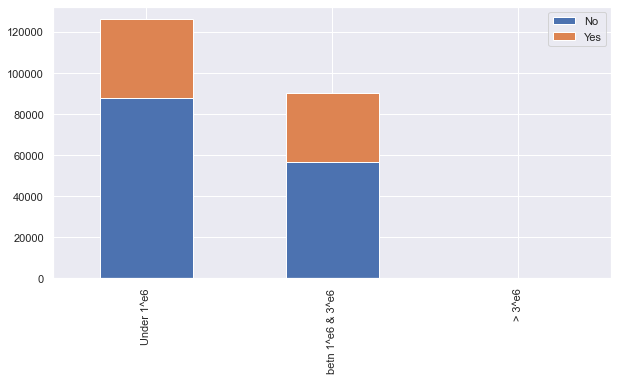

In [42]:
Pclass1 = train[train['Avg_Account_Balance']==0]['Credit_Product'].value_counts()
Pclass2 = train[train['Avg_Account_Balance']==1]['Credit_Product'].value_counts()
Pclass3 = train[train['Avg_Account_Balance']==2]['Credit_Product'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Under 1^e6','betn 1^e6 & 3^e6', '> 3^e6']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Since more the 50% under diffent average account brackets do not have credit product, fill out missing credit procut with "No" 

In [43]:
for dataset in train_test_data:
    dataset['Credit_Product'] = dataset['Credit_Product'].fillna('No')

In [44]:
credit_product_mapping = {"No": 0, "Yes": 1}
for dataset in train_test_data:
    dataset['Credit_Product'] = dataset['Credit_Product'].map(credit_product_mapping)

In [45]:
train.head(50)

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region
0,NNVBBKZB,1,2,1,2,1,0,1,0,0,0
1,IDD62UNG,1,0,2,0,1,0,0,0,0,2
2,HD3DSEMC,1,1,0,2,1,0,1,1,0,0
3,BF3NC7KV,0,0,2,0,1,0,0,0,0,3
4,TEASRWXV,1,0,2,0,1,0,0,0,0,3
5,ACUTYTWS,0,1,0,0,1,0,0,1,0,3
6,ETQCZFEJ,0,1,1,2,1,0,1,1,1,3
7,JJNJUQMQ,1,1,0,2,1,0,0,1,0,3
8,ZMQFYKCB,1,1,0,1,1,0,1,0,0,1
9,NVKTFBA2,1,1,0,1,1,1,1,0,0,0


In [46]:
train_data = train.drop(['Is_Lead','ID'], axis=1)
target = train['Is_Lead']

train_data.shape, target.shape

((245725, 9), (245725,))

In [47]:
# train_data.info()
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
Region                 0
dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler

train_data = train_data.values

# We will split independent variables(x) and dependent variable(y)
x = train_data[:,0:9] 
y = train_data[:,10]

#Scaling the data
scale = MinMaxScaler(feature_range=(0,1))
new_x = scale.fit_transform(train_data)

IndexError: index 10 is out of bounds for axis 1 with size 9